#### Initialisations

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

# Data Generation

This notebook describes the generation of the test data in this repository. The data sets should have an interesting topology for them to be useful later.

## Data Set 1 -- Linked Circles

The general idea here is to have some circles which are linked but not connected. The liked circles are joined to two different structures, a T-shape and another circle respectively. The data set will be embedded in 3 dimensions.

### Sketch
<img src="images/dataset1_sketch.png">

### Construction

In [2]:
def create_circle(r=1, n_points=10):
    """
    Create a circle of n_points, radius r
    
    Parameters
    ----------
    r : float
        The radius of the circle
    n_points : int
        The number of points in the circle
    """
    thetas = np.linspace(0, 2*np.pi, n_points)
    coords = np.zeros((n_points,2))
    coords[:,0] = np.cos(thetas)
    coords[:,1] = np.sin(thetas)
    coords *= r
    return coords

## Circles

# The first circle will be centred at the origin, in the (x,y) plane
n_circle_1 = 100
circle_1 = np.zeros((n_circle_1, 3))
circle_1[:,:2] = create_circle(1, n_circle_1)

# The second circle will be centered at (1,0,0), in the (x,z) plane
n_circle_2 = 100
circle_2 = np.zeros((n_circle_2, 3))
circle_2[:,:2] = create_circle(1, n_circle_2)
rot = np.array([[1,0,0], # To rotate it into the (x,z) plane
                [0,0,-1],
                [0,1,0]])
circle_2 = circle_2 @ rot
circle_2 += np.array([1,0,0]) # Shifts the centre

# The third circle is attached to the first circle. May as well also put it in the (x,y) plane
# I will make it slightly smaller than the others - radius of 0.8
# I will attach it at (0,1,0) - geometry says to put its centre at -1.8
n_circle_3 = 50
circle_3 = np.zeros((n_circle_3, 3))
circle_3[:,:2] = create_circle(0.8, n_circle_3)
circle_3 += np.array([0,-1.8,0])

## T-shape
# The T-shape is attatched to the second circle, at (2,0,0)
t_shape = np.zeros((100,3))
t_shape[:20,0] = np.linspace(2,3,20)
t_shape[20:,0] = 3
t_shape[20:,2] = np.linspace(-1,1,80)

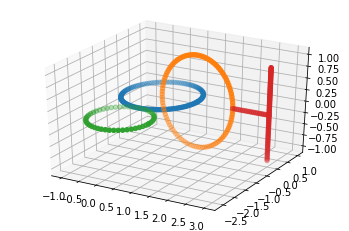

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(circle_1[:,0], circle_1[:,1], circle_1[:,2])
ax.scatter(circle_2[:,0], circle_2[:,1], circle_2[:,2])
ax.scatter(circle_3[:,0], circle_3[:,1], circle_3[:,2])
ax.scatter(t_shape[:,0], t_shape[:,1], t_shape[:,2])
plt.show()

Looks good! Save it.

In [4]:
with open('../data/dataset1.csv', 'w') as f:
    for arr in [circle_1, circle_2, circle_3, t_shape]:
        for row in arr:
            rowstr = '%0.4f,%0.4f,%0.4f\n' % (row[0], row[1], row[2])
            f.write(rowstr)